In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from statsmodels.stats import diagnostic
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import requests
from bs4 import BeautifulSoup
from utils import *

import warnings
from scipy.stats import ttest_ind
warnings.filterwarnings('ignore')

### Model building

Model Number  Policy Beta    pvalue  r-squared
0           0.0    -0.000658  0.792227   0.000639
1           1.0     0.001204  0.614886   0.126264
2           2.0     0.000869  0.630299   0.518127
3           3.0     0.001363  0.447340   0.543805
4           4.0     0.001809  0.306170   0.572395

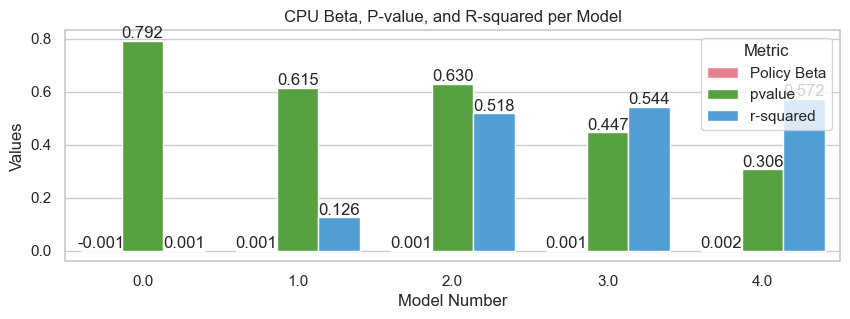

In [3]:
data_escore = pd.read_csv("data_fix/New_Master.csv")
data_escore = add_time(data_escore)
snp_sectors = ['Energy', 'Materials', 'Industrials',
       'Consumer_Discretionary', 'Consumer_Staples', 'Health_Care',
       'Financials', 'Information_Technology', 'Communication_Services',
       'Utilities', 'SP500']

linear_factors = ["Mkt_RF", "HML", "EPU", "MOM", "LIQ", 
                  "CPI_SA", "SMB", "NBDI"]
envPU = "EnvPU"
cpu = "CPU"

models = {0: None, 1: ["EPU"], 2:["EPU", "Mkt_RF", "HML", "SMB"], 3:["EPU", "Mkt_RF", "HML", "SMB", "MOM", "LIQ"],
 4:["EPU", "Mkt_RF", "HML", "SMB", "MOM", "LIQ", "CPI_SA", "NBDI"]}

reg_res = pd.DataFrame()
policy = cpu
for mdx in range(5):
       if mdx > 0:
              additional_model = "+".join(models[mdx])
              mod = smf.ols(formula=f'SP500 ~ {policy} + {additional_model}',
                     data=data_escore)
       else: 
              mod = smf.ols(formula=f'SP500 ~ {policy}',
                     data=data_escore)
       res = mod.fit()
       reg_res.loc[mdx, "Model Number"] = int(mdx)
       reg_res.loc[mdx, "Policy Beta"] = res.params.loc[policy]
       reg_res.loc[mdx, "pvalue"] = res.pvalues.loc[policy]
       reg_res.loc[mdx, "r-squared"] = res.rsquared
display(reg_res)
reg_res.to_csv("CPUnormal_model_build.csv", index = False)
# Convert the DataFrame to long format
df_long = pd.melt(reg_res, id_vars='Model Number', var_name='Metric', value_name='Value')

# Set the style of the plot
sns.set(style='whitegrid')

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 3))

# Plot the bars
sns.barplot(x='Model Number', y='Value', hue='Metric', data=df_long, ax=ax, palette='husl', dodge=True)

# Add labels and title
ax.set_xlabel('Model Number')
ax.set_ylabel('Values')
ax.set_title(f'{policy} Beta, P-value, and R-squared per Model')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01, f'{height:.3f}', ha="center")
# Show the plot
plt.show()

### Full Model Regression, with CPU and EnvPU

The policy for regression is:  EnvPU


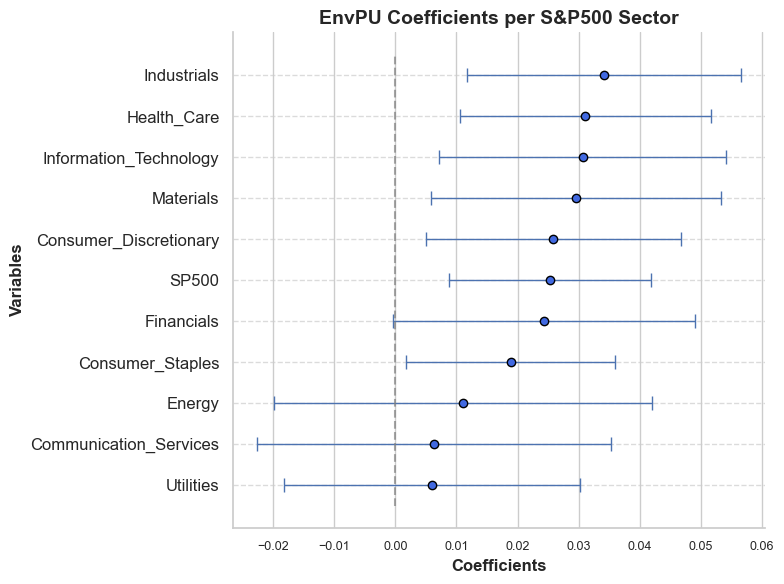

Variables  Coefficient   P-value  Coefficient STD
2              Industrials     0.034121  0.002901         0.011179
5              Health_Care     0.031093  0.003019         0.010230
7   Information_Technology     0.030612  0.010325         0.011712
1                Materials     0.029529  0.014176         0.011830
3   Consumer_Discretionary     0.025857  0.015123         0.010462
10                   SP500     0.025287  0.002933         0.008294
6               Financials     0.024316  0.052154         0.012374
4         Consumer_Staples     0.018841  0.029925         0.008555
0                   Energy     0.011066  0.476239         0.015476
8   Communication_Services     0.006343  0.662501         0.014489
9                Utilities     0.006004  0.620783         0.012098

Empty DataFrame
Columns: []
Index: []

success


0

In [3]:
regression(data_escore, policy=envPU, market_values=snp_sectors, confounders = True, which = linear_factors,
           regplots = False, descriptive_plots=False, model_results=False, coeff_plot = 
           True, pearson = False)

The policy for regression is:  CPU


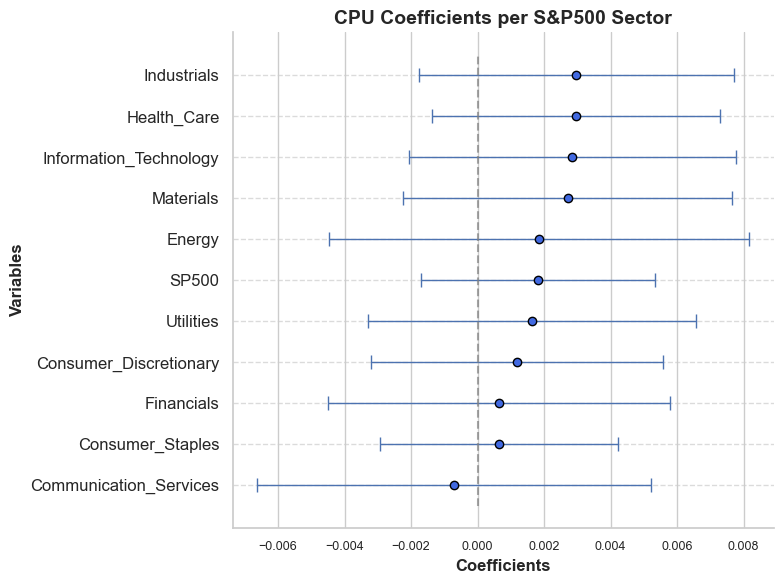

Variables  Coefficient   P-value  Coefficient STD
2              Industrials     0.002967  0.212486         0.002365
5              Health_Care     0.002960  0.173633         0.002160
7   Information_Technology     0.002853  0.247421         0.002452
1                Materials     0.002709  0.275756         0.002472
0                   Energy     0.001853  0.558929         0.003160
10                   SP500     0.001809  0.306170         0.001759
9                Utilities     0.001634  0.509034         0.002466
3   Consumer_Discretionary     0.001172  0.594487         0.002195
6               Financials     0.000645  0.802337         0.002571
4         Consumer_Staples     0.000641  0.720179         0.001786
8   Communication_Services    -0.000705  0.812182         0.002958

Empty DataFrame
Columns: []
Index: []

success


0

In [4]:
regression(data_escore, policy=cpu, market_values=snp_sectors, confounders = True, which = linear_factors,
           regplots = False, descriptive_plots=False, model_results=False, coeff_plot = 
           True, pearson = False)

### Full Model Regression, with EnvPU, on Data Ratios of top 30 companies on the bottom 30 companies per sector ranked based on external category.

Category is: Cap
Dropped companies with consecutive nans
Forward fill of NAN done 

Companies removed:


companies
Communication_Services     8.0
Consumer_Discretionary     7.0
Consumer_Staples           2.0
Energy                     5.0
Financials                 5.0
Health_Care                8.0
Industrials               11.0
Information_Technology    10.0
Materials                  6.0
Utilities                  1.0
dtype: float64

Sector ranking and ratios
Category is: Debt
Dropped companies with consecutive nans
Forward fill of NAN done 

Companies removed:


companies
Communication_Services    10.0
Consumer_Discretionary    10.0
Consumer_Staples           2.0
Energy                     5.0
Financials                 9.0
Health_Care               11.0
Industrials               17.0
Information_Technology    22.0
Materials                  6.0
Utilities                  1.0
dtype: float64

Sector ranking and ratios
Category is: Eintensity
Dropped companies with consecutive nans
Forward fill of NAN done 

Companies removed:


companies
Communication_Services    18.0
Consumer_Discretionary    35.0
Consumer_Staples           9.0
Energy                    11.0
Financials                45.0
Health_Care               42.0
Industrials               45.0
Information_Technology    35.0
Materials                 14.0
Utilities                  7.0
dtype: float64

Sector ranking and ratios
Category is: Elevel
Dropped companies with consecutive nans
Forward fill of NAN done 

Companies removed:


companies
Communication_Services    18.0
Consumer_Discretionary    35.0
Consumer_Staples           9.0
Energy                    11.0
Financials                45.0
Health_Care               42.0
Industrials               45.0
Information_Technology    36.0
Materials                 14.0
Utilities                  7.0
dtype: float64

Sector ranking and ratios
Category is: Escore
Dropped companies with consecutive nans
Forward fill of NAN done 

Companies removed:


companies
Communication_Services    10.0
Consumer_Discretionary     9.0
Consumer_Staples           2.0
Energy                     5.0
Financials                 7.0
Health_Care               17.0
Industrials               18.0
Information_Technology    17.0
Materials                  6.0
Utilities                  1.0
dtype: float64

Sector ranking and ratios
Category is: Pillarscore
Dropped companies with consecutive nans
Forward fill of NAN done 

Companies removed:


companies
Communication_Services    10.0
Consumer_Discretionary     9.0
Consumer_Staples           2.0
Energy                     5.0
Financials                 7.0
Health_Care               17.0
Industrials               18.0
Information_Technology    17.0
Materials                  6.0
Utilities                  1.0
dtype: float64

Sector ranking and ratios


Category  Policy Beta    pvalue  r-squared
0          Cap    -0.004148  0.493431   0.091314
1         Debt     0.005520  0.164649   0.039470
2   Eintensity     0.000072  0.983627   0.067200
3       Elevel    -0.008133  0.157409   0.159523
4       Escore     0.004926  0.388776   0.131600
5  Pillarscore     0.000959  0.590714   0.078580

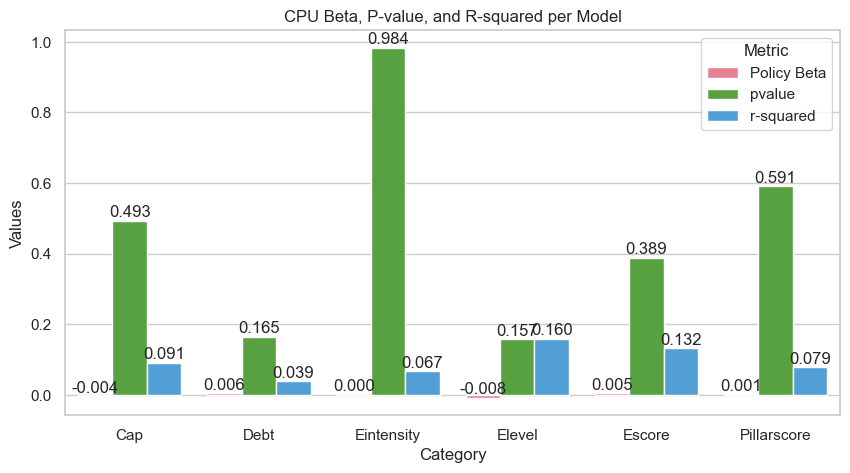

In [14]:
close_categories = ["Cap", "Debt", "Eintensity", "Elevel", "Escore", "Pillarscore"]
drop_requirements = {"Cap": 2, "Debt": 13, "Eintensity": 25, "Elevel":25, "Escore":13, "Pillarscore":13}

snp_sectors = ['Energy', 'Materials', 'Industrials',
       'Consumer_Discretionary', 'Consumer_Staples', 'Health_Care',
       'Financials', 'Information_Technology', 'Communication_Services',
       'Utilities']

policy = cpu
reg_res = pd.DataFrame()
for cdx, category in enumerate(close_categories):
    print("Category is:", category)
    closeX = pd.read_csv(f"data_fix/NCloseX{category}.csv")
    closeX = closeX.iloc[:112,:].copy()
    #closeX.iloc[1:, 1:] = french_xl(closeX.iloc[1:, 1:])
    data_ratios, _ = generate_ratios(closeX, many_return=2, many_category=drop_requirements[category], rm_name = category)

    data_ratios = add_time(data_ratios, Xformat= True)
    data_ratios = add_cols(data_ratios, data_escore, cols = ["time", envPU, cpu] + linear_factors)

    #regression(data_ratios, policy=envPU, market_values=snp_sectors, confounders = True, which = linear_factors,
    #        regplots = False, descriptive_plots=False, model_results=False, 
    #        coeff_plot = True, pearson = False)
    data_ratios["SP500"] = data_ratios[snp_sectors].apply(lambda row: row.mean(), axis = 1)

    additional_model = "+".join(models[mdx])
    mod = smf.ols(formula=f'SP500 ~ {policy} + {additional_model}',
                    data=data_ratios)

    res = mod.fit()
    reg_res.loc[cdx, "Category"] = category
    reg_res.loc[cdx, "Policy Beta"] = res.params.loc[policy]
    reg_res.loc[cdx, "pvalue"] = res.pvalues.loc[policy]
    reg_res.loc[cdx, "r-squared"] = res.rsquared


display(reg_res)
reg_res.to_csv(f"{policy}_ratio_regression.csv", index = False)

# Convert the DataFrame to long format
df_long = pd.melt(reg_res, id_vars='Category', var_name='Metric', value_name='Value')

# Set the style of the plot
sns.set(style='whitegrid')

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the bars
sns.barplot(x='Category', y='Value', hue='Metric', data=df_long, ax=ax, palette='husl', dodge=True)

# Add labels and title
ax.set_xlabel('Category')
ax.set_ylabel('Values')
ax.set_title(f'{policy} Beta, P-value, and R-squared per Model')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01, f'{height:.3f}', ha="center")
# Show the plot
plt.show()


### Top bottom regression

Category is: Cap
Dropped companies with consecutive nans
Forward fill of NAN done 

Companies removed:


companies
Communication_Services     8.0
Consumer_Discretionary     7.0
Consumer_Staples           2.0
Energy                     5.0
Financials                 5.0
Health_Care                8.0
Industrials               11.0
Information_Technology    10.0
Materials                  6.0
Utilities                  1.0
dtype: float64

Sector ranking and ratios


Sector  Policy Beta    pvalue  r-squared
0                      Energy_top     0.002476  0.439344   0.456438
1                   Energy_bottom     0.001844  0.619410   0.480039
2                   Materials_top     0.002736  0.285932   0.437155
3                Materials_bottom     0.003145  0.222575   0.511332
4                 Industrials_top     0.003191  0.190673   0.501473
5              Industrials_bottom     0.003199  0.194717   0.491733
6      Consumer_Discretionary_top     0.003288  0.198945   0.385662
7   Consumer_Discretionary_bottom     0.003070  0.238701   0.398002
8            Consumer_Staples_top     0.002324  0.227079   0.347040
9         Consumer_Staples_bottom     0.000338  0.847211   0.356711
10                Health_Care_top     0.004308  0.049090   0.357858
11             Health_Care_bottom     0.003264  0.174293   0.333999
12                 Financials_top     0.001546  0.573138   0.517419
13              Financials_bottom     0.001262  0.611903   0.545229
14     Information_Technology_top     0.003324  0.216852   0.453086
15  Information_Technology_bottom     0.004104  0.163796   0.466155
16     Communication_Services_top    -0.000089  0.971609   0.277284
17  Communication_Services_bottom    -0.000998  0.706499   0.366426
18                  Utilities_top     0.001451  0.560853   0.130836
19               Utilities_bottom     0.001746  0.487895   0.142262

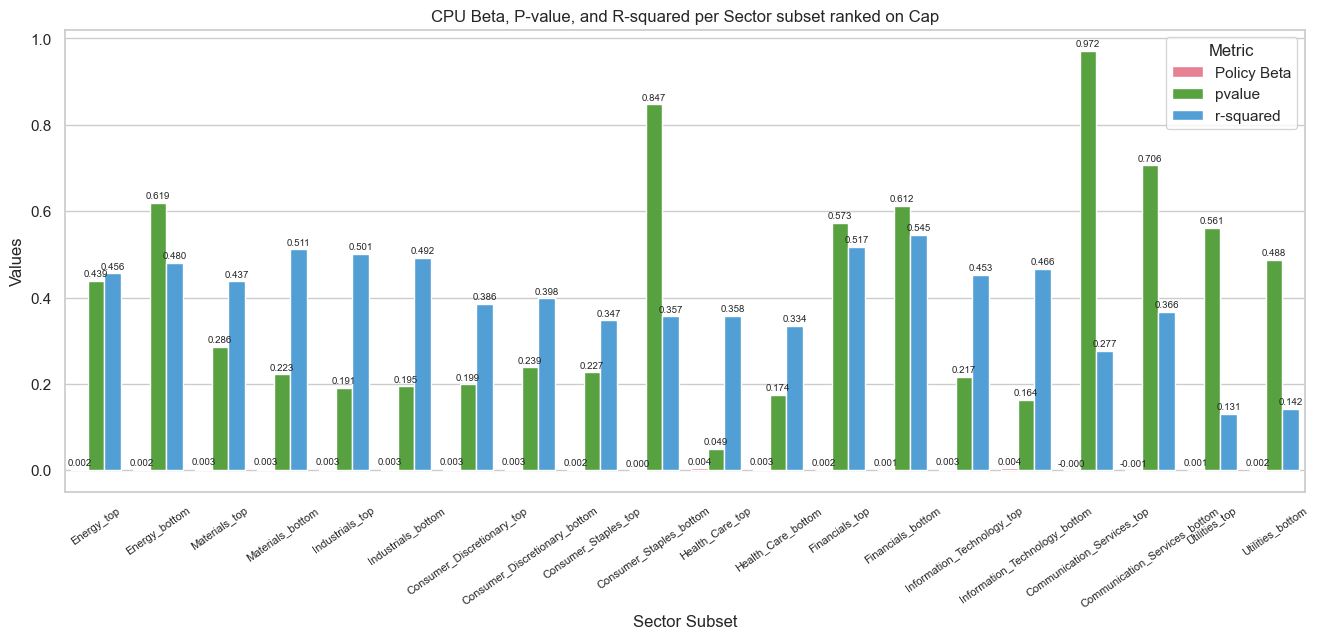

Category is: Debt
Dropped companies with consecutive nans
Forward fill of NAN done 

Companies removed:


companies
Communication_Services    10.0
Consumer_Discretionary    10.0
Consumer_Staples           2.0
Energy                     5.0
Financials                 9.0
Health_Care               11.0
Industrials               17.0
Information_Technology    22.0
Materials                  6.0
Utilities                  1.0
dtype: float64

Sector ranking and ratios


Sector  Policy Beta    pvalue  r-squared
0                      Energy_top     0.003324  0.518511   0.411640
1                   Energy_bottom     0.003031  0.474694   0.451384
2                   Materials_top     0.002731  0.477457   0.486454
3                Materials_bottom     0.002872  0.304978   0.527534
4                 Industrials_top     0.003192  0.288475   0.461842
5              Industrials_bottom     0.002760  0.288236   0.493924
6      Consumer_Discretionary_top     0.001491  0.687933   0.389897
7   Consumer_Discretionary_bottom     0.002303  0.388094   0.416875
8            Consumer_Staples_top    -0.001041  0.646593   0.307957
9         Consumer_Staples_bottom    -0.000309  0.863955   0.322777
10                Health_Care_top     0.001846  0.509895   0.318609
11             Health_Care_bottom     0.002148  0.397157   0.338659
12                 Financials_top     0.000081  0.980460   0.510252
13              Financials_bottom     0.000238  0.928314   0.538751
14     Information_Technology_top     0.002170  0.588451   0.364827
15  Information_Technology_bottom     0.002868  0.356062   0.446608
16     Communication_Services_top     0.001436  0.750881   0.193366
17  Communication_Services_bottom    -0.000372  0.893970   0.359177
18                  Utilities_top     0.003018  0.279147   0.173704
19               Utilities_bottom     0.001728  0.489396   0.140047

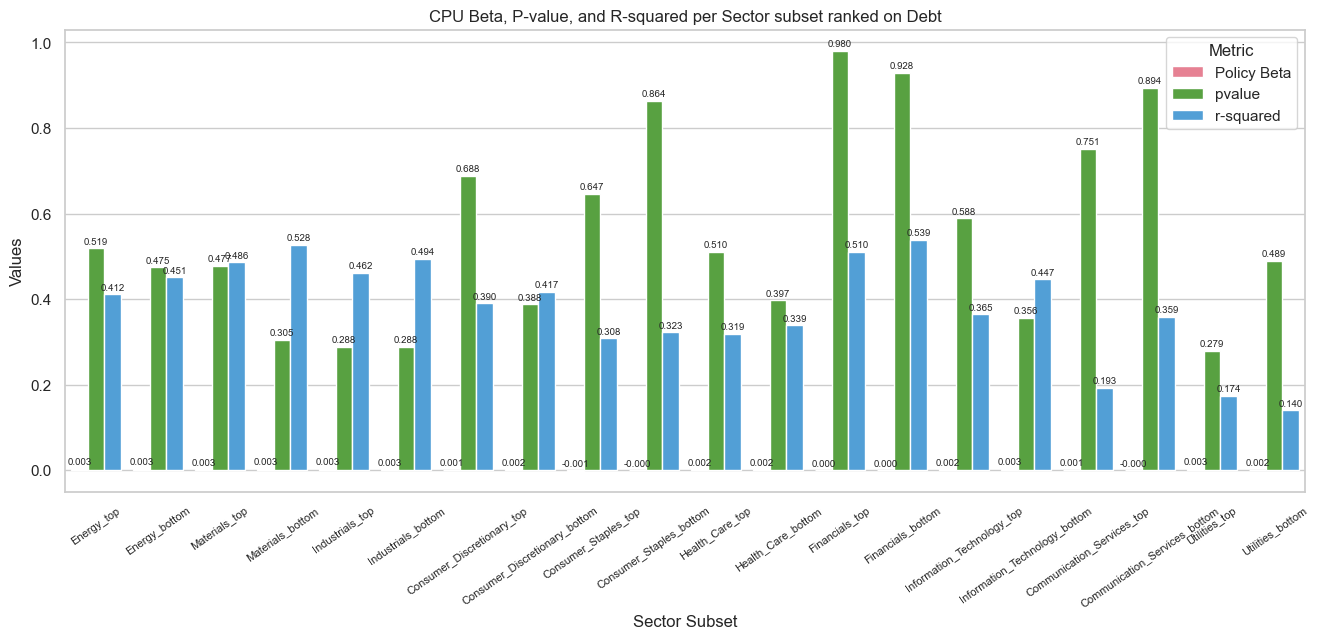

Category is: Eintensity
Dropped companies with consecutive nans
Forward fill of NAN done 

Companies removed:


companies
Communication_Services    18.0
Consumer_Discretionary    35.0
Consumer_Staples           9.0
Energy                    11.0
Financials                45.0
Health_Care               42.0
Industrials               45.0
Information_Technology    35.0
Materials                 14.0
Utilities                  7.0
dtype: float64

Sector ranking and ratios


Sector  Policy Beta    pvalue  r-squared
0                      Energy_top     0.004398  0.341881   0.419636
1                   Energy_bottom     0.002397  0.557880   0.455799
2                   Materials_top     0.001917  0.533861   0.369418
3                Materials_bottom     0.002787  0.334063   0.489208
4                 Industrials_top     0.003462  0.312628   0.372676
5              Industrials_bottom     0.003010  0.309711   0.462988
6      Consumer_Discretionary_top     0.000459  0.907377   0.261158
7   Consumer_Discretionary_bottom     0.001854  0.552594   0.392389
8            Consumer_Staples_top    -0.002079  0.315543   0.278072
9         Consumer_Staples_bottom    -0.001820  0.335306   0.318874
10                Health_Care_top     0.001509  0.523156   0.269330
11             Health_Care_bottom     0.002975  0.177837   0.380789
12                 Financials_top     0.000219  0.950219   0.476629
13              Financials_bottom     0.000166  0.955536   0.522496
14     Information_Technology_top     0.002563  0.505578   0.377552
15  Information_Technology_bottom     0.002764  0.382879   0.438334
16     Communication_Services_top    -0.001203  0.715911   0.131316
17  Communication_Services_bottom    -0.001327  0.593677   0.308981
18                  Utilities_top     0.002733  0.321265   0.107226
19               Utilities_bottom     0.001908  0.450376   0.141212

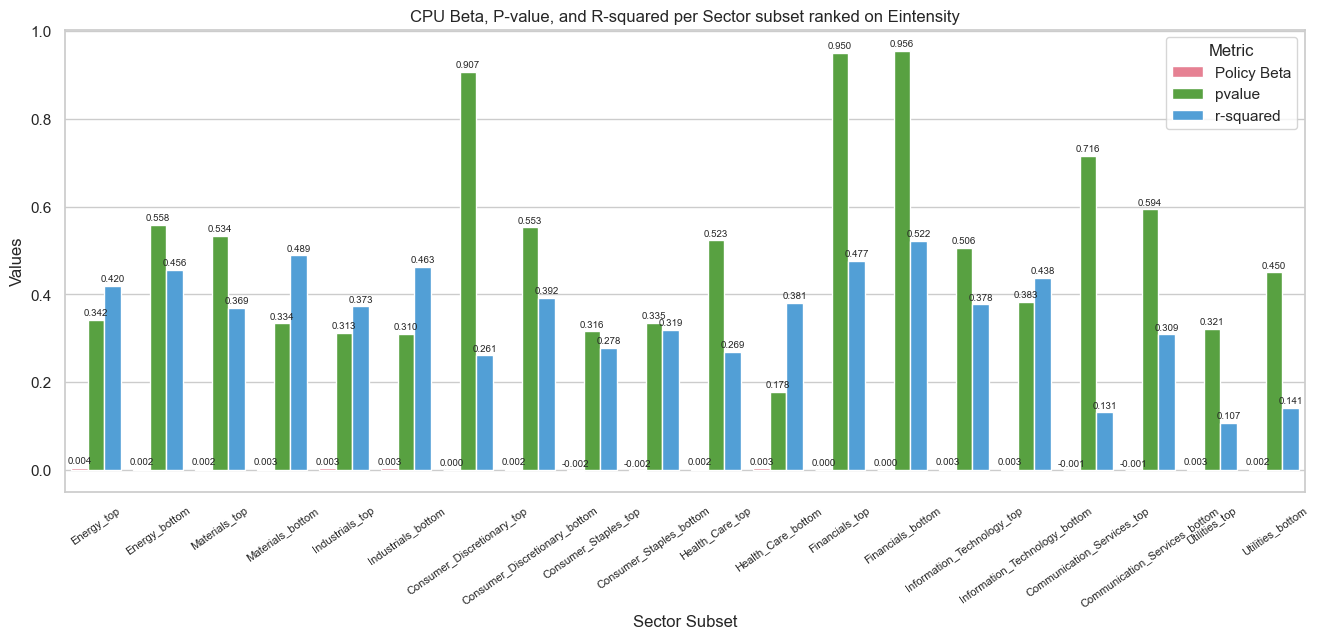

Category is: Elevel
Dropped companies with consecutive nans
Forward fill of NAN done 

Companies removed:


companies
Communication_Services    18.0
Consumer_Discretionary    35.0
Consumer_Staples           9.0
Energy                    11.0
Financials                45.0
Health_Care               42.0
Industrials               45.0
Information_Technology    36.0
Materials                 14.0
Utilities                  7.0
dtype: float64

Sector ranking and ratios


Sector  Policy Beta    pvalue  r-squared
0                      Energy_top     0.003900  0.234369   0.417480
1                   Energy_bottom     0.002703  0.503971   0.468034
2                   Materials_top     0.004397  0.204754   0.526119
3                Materials_bottom     0.002770  0.314652   0.504480
4                 Industrials_top     0.003819  0.236010   0.412153
5              Industrials_bottom     0.003825  0.168457   0.465841
6      Consumer_Discretionary_top     0.002203  0.545292   0.347638
7   Consumer_Discretionary_bottom     0.001562  0.610174   0.396792
8            Consumer_Staples_top    -0.000564  0.766877   0.347956
9         Consumer_Staples_bottom    -0.000932  0.617869   0.342169
10                Health_Care_top     0.002135  0.370480   0.260466
11             Health_Care_bottom     0.002849  0.214142   0.308746
12                 Financials_top    -0.000746  0.834029   0.500326
13              Financials_bottom     0.000867  0.769545   0.535024
14     Information_Technology_top     0.001686  0.639921   0.365409
15  Information_Technology_bottom     0.002578  0.383237   0.452071
16     Communication_Services_top    -0.001203  0.715911   0.131316
17  Communication_Services_bottom    -0.001327  0.593677   0.308981
18                  Utilities_top     0.002226  0.410090   0.136250
19               Utilities_bottom     0.001922  0.447597   0.139545

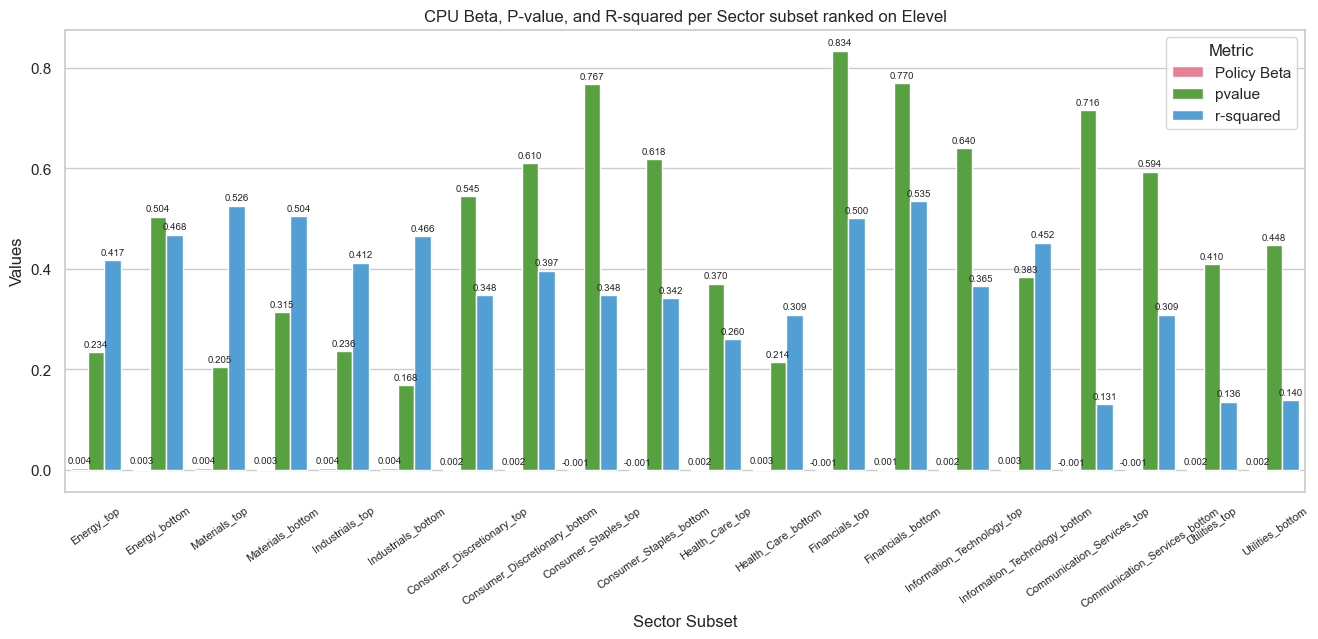

Category is: Escore
Dropped companies with consecutive nans
Forward fill of NAN done 

Companies removed:


companies
Communication_Services    10.0
Consumer_Discretionary     9.0
Consumer_Staples           2.0
Energy                     5.0
Financials                 7.0
Health_Care               17.0
Industrials               18.0
Information_Technology    17.0
Materials                  6.0
Utilities                  1.0
dtype: float64

Sector ranking and ratios


Sector  Policy Beta    pvalue  r-squared
0                      Energy_top     0.004052  0.282233   0.457470
1                   Energy_bottom     0.002199  0.573997   0.470078
2                   Materials_top     0.004204  0.139199   0.516546
3                Materials_bottom     0.002266  0.380139   0.517926
4                 Industrials_top     0.003161  0.266448   0.450374
5              Industrials_bottom     0.002961  0.240385   0.504865
6      Consumer_Discretionary_top     0.001915  0.470922   0.437441
7   Consumer_Discretionary_bottom     0.002424  0.340401   0.423256
8            Consumer_Staples_top     0.000906  0.637292   0.322871
9         Consumer_Staples_bottom    -0.000452  0.792091   0.361101
10                Health_Care_top     0.003029  0.184235   0.298019
11             Health_Care_bottom     0.002765  0.230803   0.344371
12                 Financials_top     0.000827  0.783733   0.541290
13              Financials_bottom     0.001118  0.660375   0.557995
14     Information_Technology_top     0.003123  0.291027   0.432178
15  Information_Technology_bottom     0.003051  0.309626   0.468328
16     Communication_Services_top    -0.000271  0.913950   0.323569
17  Communication_Services_bottom    -0.001038  0.672087   0.427397
18                  Utilities_top     0.002127  0.454837   0.103512
19               Utilities_bottom     0.001848  0.471523   0.122782

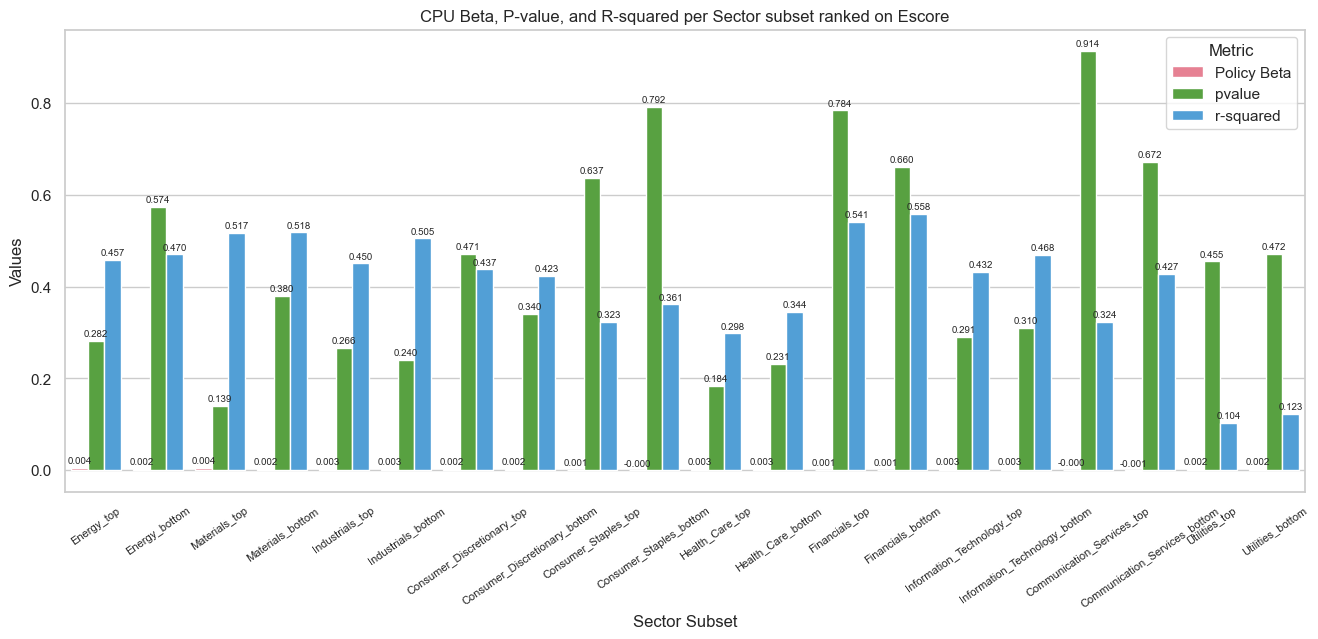

Category is: Pillarscore
Dropped companies with consecutive nans
Forward fill of NAN done 

Companies removed:


companies
Communication_Services    10.0
Consumer_Discretionary     9.0
Consumer_Staples           2.0
Energy                     5.0
Financials                 7.0
Health_Care               17.0
Industrials               18.0
Information_Technology    17.0
Materials                  6.0
Utilities                  1.0
dtype: float64

Sector ranking and ratios


Sector  Policy Beta    pvalue  r-squared
0                      Energy_top     0.004524  0.218757   0.473601
1                   Energy_bottom     0.001803  0.637567   0.481473
2                   Materials_top     0.002688  0.286661   0.516530
3                Materials_bottom     0.002477  0.336327   0.522680
4                 Industrials_top     0.003729  0.165693   0.481039
5              Industrials_bottom     0.002900  0.256122   0.504642
6      Consumer_Discretionary_top     0.002946  0.274487   0.415302
7   Consumer_Discretionary_bottom     0.002170  0.394225   0.431951
8            Consumer_Staples_top     0.000083  0.966591   0.347453
9         Consumer_Staples_bottom    -0.000525  0.762567   0.361214
10                Health_Care_top     0.003187  0.153856   0.340031
11             Health_Care_bottom     0.003088  0.171069   0.368183
12                 Financials_top     0.000059  0.983977   0.538290
13              Financials_bottom     0.001006  0.689771   0.552946
14     Information_Technology_top     0.004107  0.141422   0.472873
15  Information_Technology_bottom     0.003354  0.266775   0.476359
16     Communication_Services_top    -0.000992  0.709554   0.209450
17  Communication_Services_bottom     0.000802  0.757591   0.395666
18                  Utilities_top     0.001840  0.525370   0.090978
19               Utilities_bottom     0.001705  0.508880   0.124899

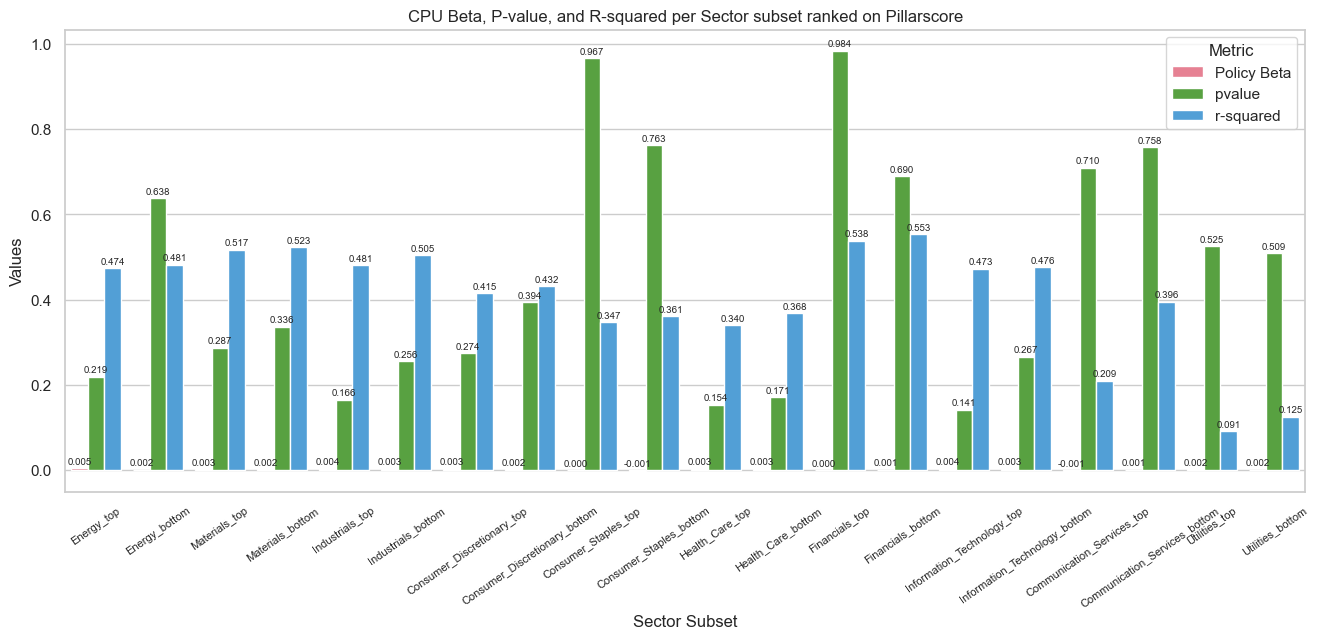

In [27]:
close_categories = ["Cap", "Debt", "Eintensity", "Elevel", "Escore", "Pillarscore"]
drop_requirements = {"Cap": 2, "Debt": 13, "Eintensity": 25, "Elevel":25, "Escore":13, "Pillarscore":13}

snp_sectors = ['Energy', 'Materials', 'Industrials',
       'Consumer_Discretionary', 'Consumer_Staples', 'Health_Care',
       'Financials', 'Information_Technology', 'Communication_Services',
       'Utilities']

policy = cpu
for cdx, category in enumerate(close_categories):
       reg_res = pd.DataFrame()
       print("Category is:", category)
       closeX = pd.read_csv(f"data_fix/NCloseX{category}.csv")
       closeX = closeX.iloc[:112,:].copy()
       #closeX.iloc[1:, 1:] = french_xl(closeX.iloc[1:, 1:])
       data_ratios, dr_mean = generate_ratios(closeX, many_return=2, many_category=drop_requirements[category], rm_name = category)

       dr_mean = add_time(dr_mean, Xformat= True)
       dr_mean = add_cols(dr_mean, data_escore, cols = ["time", envPU, cpu] + linear_factors)
       #columns of interest
       coi = [col for col in dr_mean.columns if any(sector in col for sector in snp_sectors)]
       for ccdx, c in enumerate(coi): 
              additional_model = "+".join(linear_factors)
              mod = smf.ols(formula=f'{c} ~ {policy} + {additional_model}',
                     data=dr_mean)
              res = mod.fit()
              reg_res.loc[ccdx, "Sector"] = c
              reg_res.loc[ccdx, "Policy Beta"] = res.params.loc[policy]
              reg_res.loc[ccdx, "pvalue"] = res.pvalues.loc[policy]
              reg_res.loc[ccdx, "r-squared"] = res.rsquared
       display(reg_res)
       reg_res.to_csv(f"{policy}_{category}_sector_top_bottom_regression.jpg.csv", index = False)
       # Convert the DataFrame to long format
       df_long = pd.melt(reg_res, id_vars='Sector', var_name='Metric', value_name='Value')

       # Set the style of the plot
       sns.set(style='whitegrid')

       # Set up the figure and axes
       fig, ax = plt.subplots(figsize=(16, 6))

       # Plot the bars
       sns.barplot(x='Sector', y='Value', hue='Metric', data=df_long, ax=ax, palette='husl', dodge=True)

       # Add labels and title
       ax.set_xlabel('Sector Subset')
       ax.set_ylabel('Values')
       ax.set_title(f'{policy} Beta, P-value, and R-squared per Sector subset ranked on {category}')
       ax.set_xticklabels(ax.get_xticklabels(), rotation=35, fontsize=8)
       for p in ax.patches:
              height = p.get_height()
              ax.text(p.get_x() + p.get_width() / 2., height + 0.01, f'{height:.3f}', ha="center", fontsize = 7)
       # Show the plot
       plt.savefig(f'{policy}_{category}_sector_top_bottom_regression.jpg', dpi=300, bbox_inches='tight')
       plt.show()


### Per company regression

dropped companies with consecutive nans
forward fill of nan done
regressions done


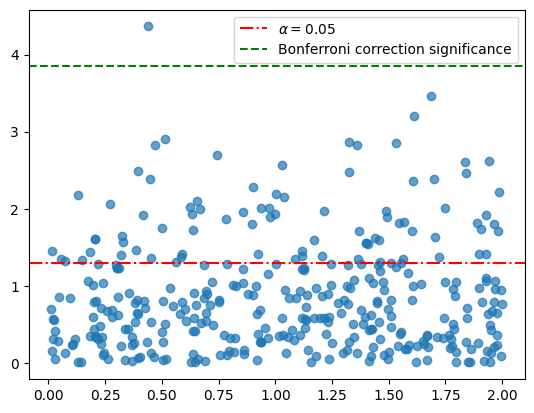

Companies the most impacted by EnvPU with suggested significance level of 2 (in -log10):

 Positive company count: 329 || Negative company count: 27
L2Y Average Debt of positive correlated companies: 42.41234885157042
L2Y Average Debt of negative correlated companies: 65.92228827160494
student's t-test results: TtestResult(statistic=-2.0279426020637694, pvalue=0.04331462236446101, df=354.0)


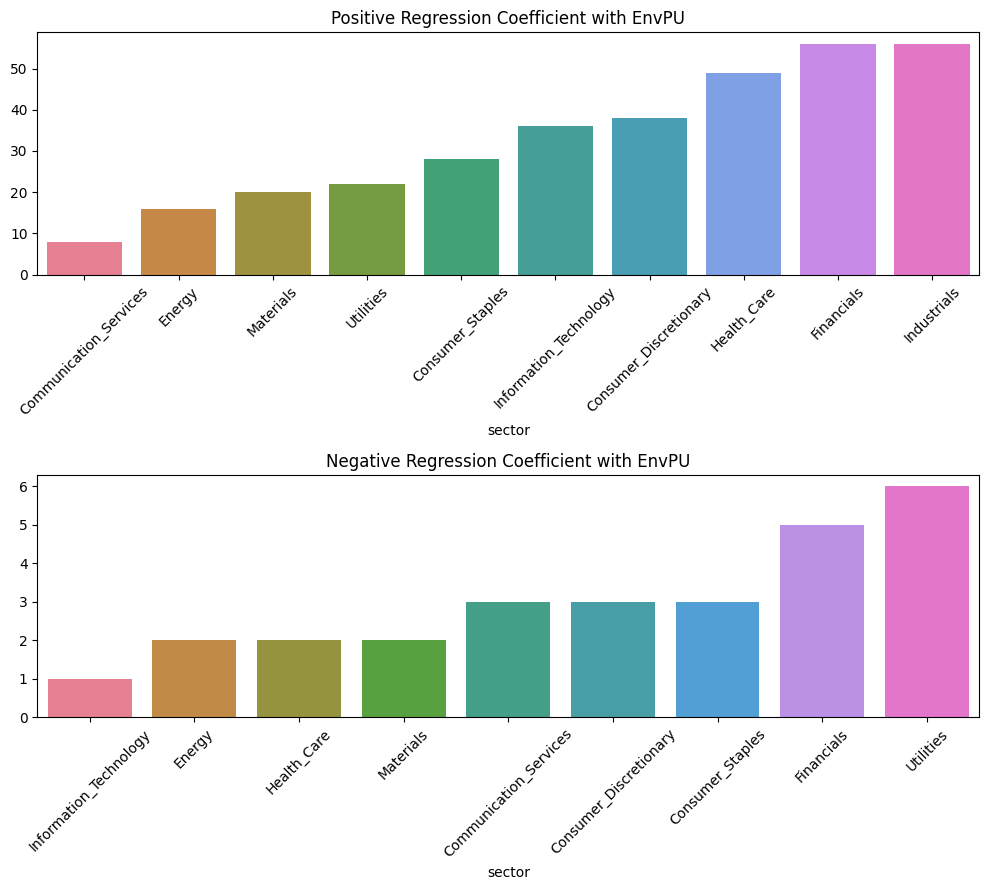

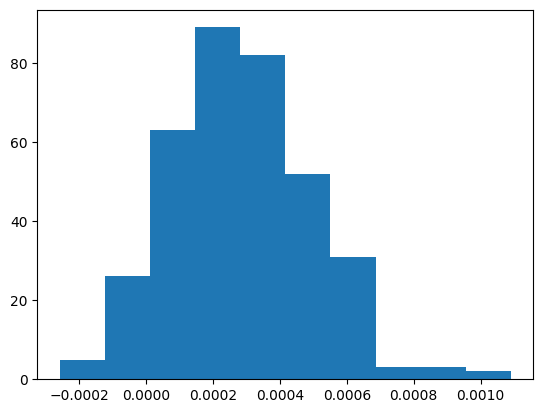

'success'

In [41]:
close_categories = ["Cap", "Debt", "Eintensity", "Elevel", "Escore", "Pillarscore"]
drop_requirements = {"Cap": 2, "Debt": 13, "Eintensity": 25, "Elevel":25, "Escore":13, "Pillarscore":13}
for cdx, category in enumerate(close_categories):
    print("Category is:", category)
    closeX = pd.read_csv(f"data_fix/NCloseX{category}.csv")
    closeX = closeX.iloc[:112,:].copy()
    
    company_regression("Debt", data_escore, policy=envPU, reg_cols=["time", envPU] + linear_factors, 
                    confounders = True, which = linear_factors, manhattan=True, split_2=True, 
                    split_significant=False, real_names=False, adaptive=True)